# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MDS 3020 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Profesora:** Paula Aguirre <br>

# Tarea 3: Análisis exploratorio de datos.

***
## Instrucciones Generales.
- Esta Tarea debe ser desarrollada completamente en lenguaje de programación Python, y estructurarse en formato de Jupyter Notebook.
- El Notebook debe estrar estructurado en forma ordenado, seguir buenas prácticas de escritura y programación, e incluir comentarios o celdas de markdown suficientes para explicar claramente todos los códigos computacionales.
- Para cada pregunta, incluya un breve **análisis de los gráficos y/o resúmentes estadísticos generados**, de manera de responder a las preguntas planteadas.

***
## Introducción.


Continuando con el caso de estudio desarrollado en las Tareas 1 y 2, suponga que ud.está a cargo del desarrollo de un estudio del mercado laboral de científicos de datos en latinoamérica, para lo cual necesita construir, procesar y analizar una base de datos con las ofertas de trabajo publicadas en distintos países de la región.

En la **Tarea 1**, ud. avanzó en la primera etapa de construcción de la base de datos, utilizando web scraping para extraer los datos de ofertas de empleo en *data science* publicados en la red Linkedin, para una ciudad o país. Este proceso fue repetido y ampliado para todos los países de sudamérica, para construir una base de datos más amplia para su estudio.  

Para considerar en el análisis el contexto económico y tecnológico de cada país, entre los datos se incluirán también otras variables como el *Índice global de innovación* (https://www.globalinnovationindex.org/Home), disponible online para distintos países del mundo.

En la **Tarea 2**, ud. realizó el proceso de integración, limpieza y procesamiento de las bases de datos obtenidas mediante webscraping, generando así un conjunto de datos apto para distintos tipos de análisis.

Para esta **Tarea 3**, se ha enriquecido la base de datos generada en la Tarea 2, incorporando variables relativas a: salarios ofrecidos para cada puesto de trabajo, años de experiencia y nivel de educación exigidos, y un score de ambiente laboral de cada empresa ofertante. Esta es la base de datos final a utilizar para el análisis y modelamiento de datos.

El objetivo de esta Tarea, es realizar un análisis exploratorio de los datos, comprender las relaciones o tendencias entre distintas variables, y obtener conclusiones útiles que permitan esbozar un modelo predictivo de los salarios de cientistas de datos como función de su país, formación y experiencia profesional, y/o indicadores de la compañía.

## Datos de Entrada.

La base de datos final de ofertas de empleo para Cientistas de Datos en Sudamérica están disponibles en el siguiente archivo: `datos_t3.csv`

Esta base de datos contiene las siguientes variables:

* `Country`: país del anuncio.
* `Location`: ubicación del empleo.
* `Title`: título del cargo ofrecido.
* `Company`: nombre de la compañía.
* `Url`: URL del anuncio.
* `CountryScore`: *Índice global de innovación* del país del anuncio.
* `English`: requisito de inglés para el empleo. 1: requiere idioma inglés, 0: no requiere idioma inglés.
* `EducationLevel`: años de formación profesional requeridos para el cargo. 0: no requiere formación profesional, 1: formación técnica básica, 2: dos años de formación técnica, 3: tres años de formación técnica,     4: bachiller, 5: título profesional, 6: postgrado.
* `YearsExperience`: años de experiencia laboral requeridos.
* `CompanyScore`: calificación de ambiente laboral de la compañía.

**Nota**: estos datos han sido parcialmente simulados para efectos de este ejercicio, no los utilice para ninguna toma de decisión real.



In [1]:
import pandas as pd

df = pd.read_csv('datos_t3.csv', sep=';')
df.head()

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,3,6,6.683722,2621
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,10.035329,2195
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,4,9,4.988700,3474
3,Chile,"Rancagua, O'Higgins Region, Chile",Data Scientist,Agrosuper,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,1.766855,2195
4,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,MAS Analytics,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,1,4,6.331954,1037


### 1. ¿Cómo se distribuyen los datos de empleos por país?  

Genere un gráfico de barras o resumen estadístico que muestre claramente esta distribución. Además comente, ¿Están balanceados los datos, o puede identificar algún(os) países para los cuales los datos sean poco representativos?

*Funciones útiles:* `sns.countplot()`,`pd.groupby()`,`pd.pivot_table()`.

#### **RESPUESTA**: los datos están levemente balanceados pues si bien la mayoría superan el umbral de 80 empleos, hay algunos de ellos como Suriname, Colombia, Argentina y Chile que cuentan con pocos datos. Si utilizamos el dataset entero, las conclusiones que saquemos no serán del todo aplicables a dichos países pues están poco representados en el dataset.

<Axes: xlabel='count', ylabel='Country'>

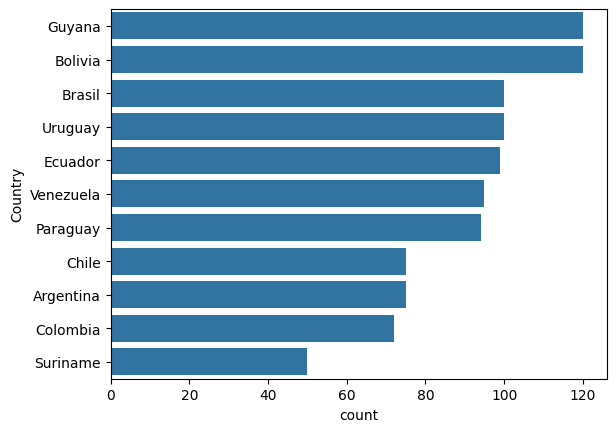

In [2]:
import seaborn as sns
empleos_por_pais = df['Country'].value_counts().sort_values(ascending=False)
#empleos_por_pais.plot(kind='barh')
sns.countplot(data=df, y='Country', order=empleos_por_pais.index)

### 2. Estudie la distribución de salarios en el dataset, y analice la existencia de datos anómalos.

**a)** Genere un histograma para la variable *SalaryUSD*, incluyendo una curva de densidad de probabilidad (kde).<br>
**b)** ¿Puede identificar valores fuera de rango o anómalos? ¿Por qué son anómalos, y a qué países corresponden?<br>
**c)** ¿Qué tratamiento daría ud. a esos datos anómalos? (Ej: nada, eliminar, corregir, etc.) Justifique e implemente su propuesta. <br>

*Funciones útiles:* `sns.histplot()`, `pd.describe()`.

#### **RESPUESTA**.
b. Para identificar datos anómalos podemos usar el método del rango intercuantil, que se considera como outliers aquellas observaciones que estén a +-1.5 veces el rango intercuantil. Tomando este enfoque, podemos ver que los valores anómalos corresponden a los países de Suriname (3), Guyana (2) y Chile (1)

También podemos definirlo de manera visual, observando la distribución de los datos y los percentiles pues hay un gran salto de magnitud entre el salario del percentil 99 y el valor máximo.

En este caso, usaré el método de rango intercuartil pues es un valor que hace sentido con el análisis visuales


c. Como son pocos datos, los eliminaré pues vienen de países poco representados (a excepción de Guyana, pero al ser el país más representado, no se verá afectado a nivel estadístico por el cambio).
Un approach más estadísticamente correcto sería winzorizar la variable: llevar los valores de outliers hacia el rango superior donde los datos se consideran normales

<Axes: xlabel='SalaryUSD', ylabel='Count'>

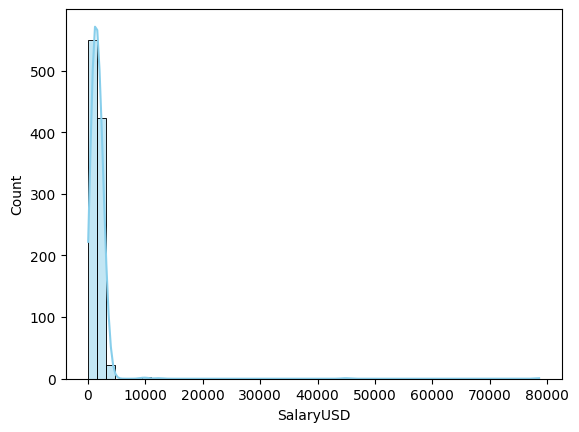

In [3]:
import seaborn as sns
sns.histplot(df['SalaryUSD'], kde=True, color='skyblue', bins=50)

In [4]:
df.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
count,515.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,26.896117,0.519000,2.973000,6.985000,5.070424,1722.12300
std,4.617231,0.499889,1.086946,1.480191,2.037362,2935.96947
min,20.300000,0.000000,0.000000,2.000000,-1.513845,42.00000
10%,20.300000,0.000000,2.000000,5.000000,2.421964,713.00000
20%,22.600000,0.000000,2.000000,6.000000,3.326208,875.00000
30%,22.600000,0.000000,2.000000,6.000000,4.025564,1007.00000
40%,28.600000,0.000000,3.000000,7.000000,4.614573,1209.80000
50%,28.600000,1.000000,3.000000,7.000000,5.093822,1475.00000
60%,29.200000,1.000000,3.000000,7.000000,5.649332,1762.00000


In [5]:
# podemos usar el método de rango intercuartil para identificar outliers

p25 = df['SalaryUSD'].quantile(0.25)
p75 = df['SalaryUSD'].quantile(0.75)
IQR = p75 - p25

# Determinar límites para outliers
lower_bound = p25 - 1.5 * IQR
upper_bound = p75 + 1.5 * IQR

print(f"Valor desde que se consideran los outliers: {upper_bound}")

# Filtrar los datos anómalos
outliers = df[(df['SalaryUSD'] < lower_bound) | (df['SalaryUSD'] > upper_bound)]
df['flag_salario_outlier'] = df['SalaryUSD'].apply(lambda x: 1 if (x < lower_bound) | (x > upper_bound) else 0)

df.groupby('Country')['flag_salario_outlier'].sum().sort_values(ascending=False)

Valor desde que se consideran los outliers: 3935.5


Country
Suriname     3
Guyana       2
Chile        1
Brasil       0
Bolivia      0
Argentina    0
Colombia     0
Ecuador      0
Paraguay     0
Uruguay      0
Venezuela    0
Name: flag_salario_outlier, dtype: int64

In [6]:
df = df[df['flag_salario_outlier']==0]

Text(0.5, 1.0, 'Histograma sin outliers')

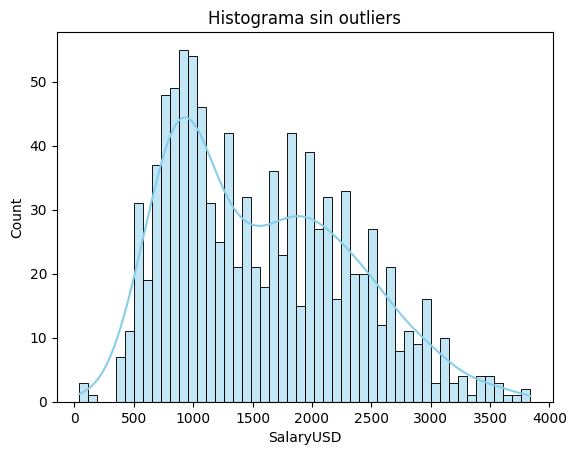

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['SalaryUSD'], kde=True, color='skyblue', bins=50)
plt.title('Histograma sin outliers')

### 3. ¿Cómo se comparan en general los salarios promedio de Cientistas de Datos por país?

Genere un gráfico de cajas que muestre la media y dispersión de los salarios para cada país y analice.
¿Cuáles son los países con mayores y menores salarios medios?

*Funciones útiles:* `sns.boxplot()`

#### **Respuesta**
El país con mayor salario medio es Chile y el que tiene menor salario medio es Guyana. Conectando este dato con la pregunta 1, podemos ver que, si bien Guyana tiene muchos trabajos de científico de datos, estos son por un salario bastante bajo.
Brasil tiene un mejor 

<Axes: xlabel='SalaryUSD', ylabel='Country'>

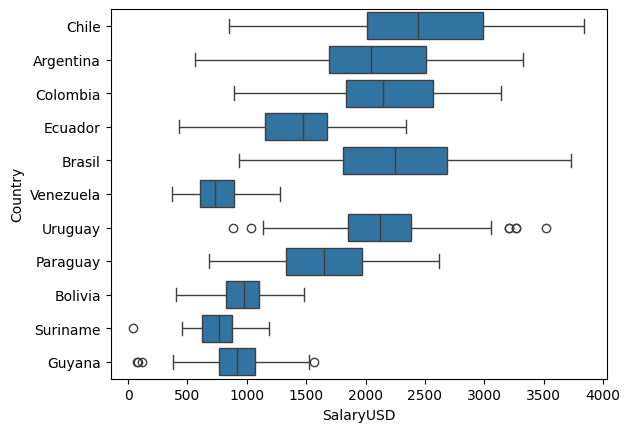

In [9]:
import seaborn as sns
sns.boxplot(data=df, y='Country', x='SalaryUSD')

### 4. ¿Influye el manejo del idioma inglés en los salarios? ¿Influye (o no) de la misma manera para todos los países?

Genere un **resumen estadístico y un gráfico** que le permitan responder fundadamente esta pregunta, y argumente su respuesta.

*Funciones útiles:* `sns.boxplot()`,`pd.groupby()`,`pd.pivot_table()`

#### **RESPUESTA**

El manejo del idioma inglés sí influye en los salarios. De manera general, vemos que el salario medio de las ofertas de empleo que piden inglés es mayor que aquellas ofertas en las que no se pide inglés.
Este hecho se repite en mayor o menor medida en todos los países.

In [15]:
df['English'].value_counts()

English
1    515
0    479
Name: count, dtype: int64

<Axes: ylabel='SalaryUSD'>

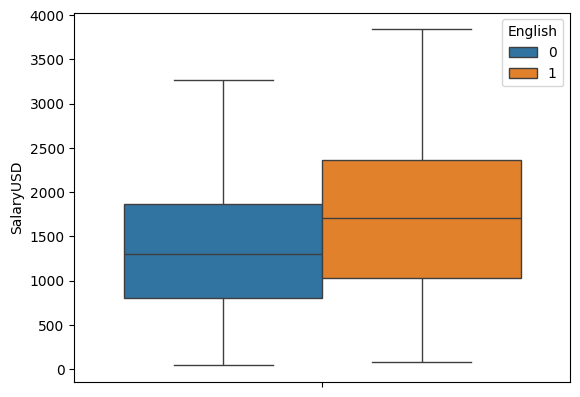

In [14]:
import seaborn as sns
sns.boxplot(data=df, y='SalaryUSD', hue='English')

<Axes: xlabel='SalaryUSD', ylabel='Country'>

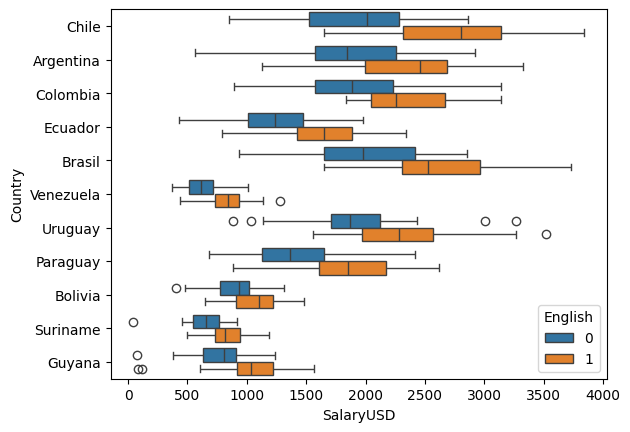

In [17]:
sns.boxplot(data=df,y='Country', x='SalaryUSD', hue='English')

### 5. Analice los  años de experiencia y nivel educacional requeridos en los distintos países de sudamérica. ¿Son similares, o puede detectar alguna diferencia significativa para alguno(s)?

Genere una **tabla resumen y gráficos** con los promedios de las variables *EducationLevel* y *YearsExperience* por país, y en base a ellos argumente su respuesta.

*Funciones útiles:* `sns.boxplot()`,`pd.groupby()`,`pd.pivot_table()`

#### **Respuesta**
Para todos los países los años de experiencia y el nivel educacional requerido son similares, no hay un diferencia significativa

In [19]:
df.head()

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD,flag_salario_outlier
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,3,6,6.683722,2621,0
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,10.035329,2195,0
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,4,9,4.988700,3474,0
3,Chile,"Rancagua, O'Higgins Region, Chile",Data Scientist,Agrosuper,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,1.766855,2195,0
4,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,MAS Analytics,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,1,4,6.331954,1037,0


In [21]:
promedios = df.groupby('Country')[['EducationLevel', 'YearsExperience']].mean()
promedios

,EducationLevel,YearsExperience
Country,,
Argentina,3.013333,7.040000
Bolivia,2.983333,6.908333
Brasil,3.070000,7.130000
Chile,2.756757,6.770270
Colombia,3.041667,7.097222
Ecuador,2.848485,6.878788
Guyana,2.974576,7.186441
Paraguay,3.117021,6.936170
Suriname,3.042553,6.936170


Text(0.5, 1.0, 'Nivel de Educación')

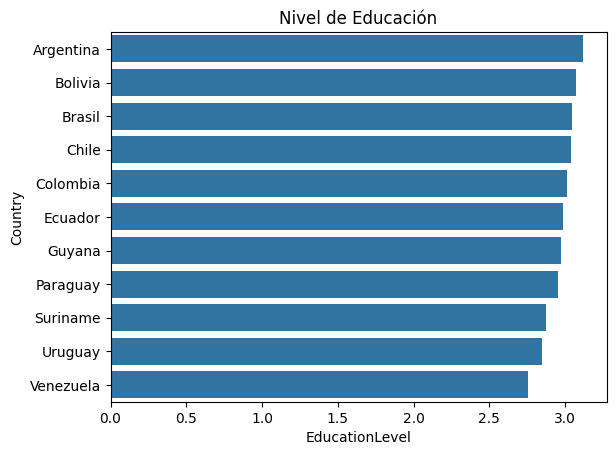

In [26]:
sns.barplot(data=promedios.sort_values(by='EducationLevel', ascending=False), y=promedios.index, x='EducationLevel')
plt.title('Nivel de Educación')

Text(0.5, 1.0, 'Experiencia')

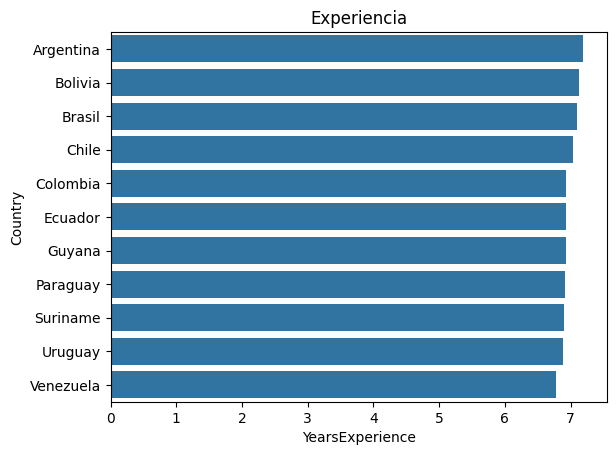

In [27]:
sns.barplot(data=promedios.sort_values(by='YearsExperience', ascending=False), y=promedios.index, x='YearsExperience')
plt.title('Experiencia')

### 6. Calcule y grafique la matriz de correlación para las variables numéricas del dataset.

Analice los coeficientes de correlación entre *SalaryUSD* y otras variables del dataset. ¿Cuáles variables identifica como más correlacionadas, o más relevantes para construir un modelo predictivo de salarios?

*Funciones útiles:* `sns.heatmap()` ,`pd.corr()`

#### **RESPUESTA**
Las variables más relevantes son el nivel de educación y los años de experiencia. Si bien el Country Score da una correlación alta, tiene muchos valores nulos. También se puede usar el indicador de si la oferta requiere inglés

<Axes: >

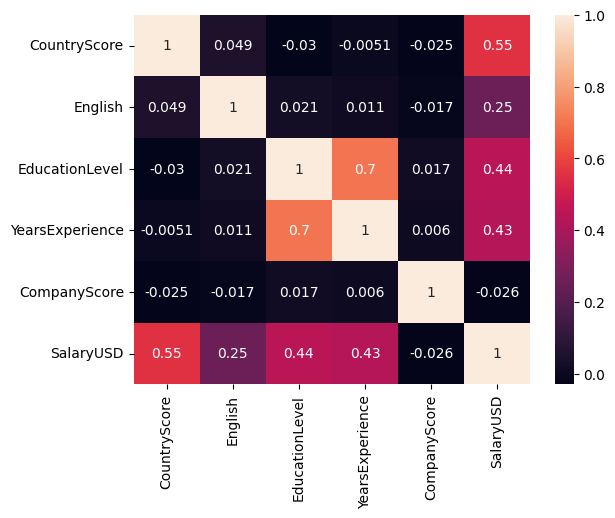

In [38]:
matriz_corr = df.drop('flag_salario_outlier', axis=1).corr(numeric_only=True)
sns.heatmap(matriz_corr, annot=True)

### 7. Construya gráficos de dispersión entre salarios y las demás variables.

**a)** Genere un conjunto de gráficos de dispersión entre `SalaryUSD` y las demás variables, diferenciando por país.(Hint: Revise cuidadosamente la documentación y parámetros de la función `sns.pairplot()`). <br>
**b)** Analice los gráficos y comente,
* ¿qué correlaciones puede identificar?
* ¿varían estas correlaciones por país?
* ¿son coherentes las conclusiones obtenidas a partir de los gráficos, con la matriz de correlación calculada en el punto 5?

*Funciones útiles:* `sns.pairplt()`

#### **RESPUESTA**
b. Se puede identificar que existe una fuerte correlación positiva entre el salario de las ofertas y el nivel de educación y, además, con los años de experiencia requeridos. Estos resultados tiene sentido con lo obtenido en la pregunta 5 pues, en dicha pregunta, se pedían aproximadamente los mismos requerimentos de experiencia y educación en todos los países, es por eso que se puede extrapolar que existe una correlación positiva fuerte entre el salario de las ofertas y lo que piden de experiencia y educación (sin importar el país).

Esto se confirma cuando vemos el gráfico de dispersión entre el salario y el nivel de educación, todos los países parecen seguir la tendencia positiva general. Es el mismo caso para los años de experiencia.

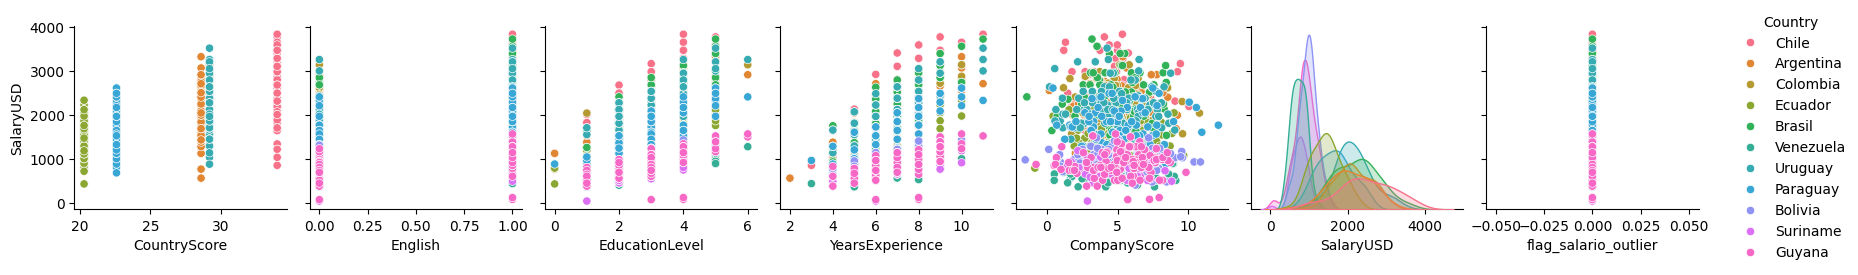

In [39]:
sns.pairplot(df, hue='Country',y_vars=['SalaryUSD'])

### 8. Analice la correlación entre variables para un país en particular.

**a)** Seleccione los registros del Dataframe correspondientes a un país a su elección, y calcule nuevamente la matriz de correlación para este subconjunto de los datos. <br>
**b)** Analice: ¿Cómo varían sus resultados respecto a la matriz de correlación calculada con todos los datos en el punto 6? ¿Qué conclusión puede obtener a partir de esta comparación, que sea de utilidad para la construcción de un modelo predictivo de salarios?

*Funciones útiles:* `sns.heatmap()` ,`pd.corr()`

#### **Respuesta**

b. En mi caso, elegí Chile. La correlación entre la variable SalaryUSD y experiencia junto con el nivel de educación crecieron, quedando muy cercano a 1 (86% para el nivel de educación y 84% para la experiencia). 

<Axes: >

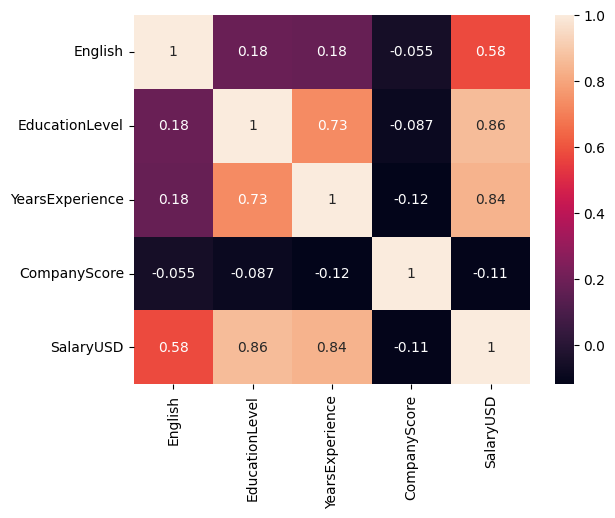

In [42]:
df_chile = df[df['Country']=='Chile']
df_chile_corr = df_chile.drop(['flag_salario_outlier', 'CountryScore'],axis=1).corr(numeric_only=True)
sns.heatmap(df_chile_corr, annot=True)

### 9. Genere un modelo de regresión multilineal para todo el conjunto de datos.

**a)** Indique claramente las variables predictoras a incluir en su modelo de regresión, justificando su elección.
**b)** Implemente la regresión lineal utilizando la librería `statsmodel`.<br>
**c)** Imprima y analice el resumen de los resultados de la regresión, comente: ¿qué tan bueno o malo es el ajuste multilineal? ¿cuál es la importancia relativa de las distintas variables predictoras?<br>
**d)** Repita los puntos **b)** y **c)**, ahora con el subconjunto de datos del país elegido en el punto 7.¿Cómo cambian sus resultados respecto a la regresión obtenida en **b)**?<br>

*Funciones útiles:* `stasmodel` ,`sm.OLS(y,X)`,`model.fit()`,`results.summary()`

#### **RESPUESTA**
c. El ajuste multilineal es malo, pues el R cuadrado es de 0.280 y eso indica que la contribución de las variables explicativas para modelar SalaryUSD es poca.
Sin embargo, la importancia relativa de las variables es alta pues el pvalue de cada una es de 0, lo que indica que son variables necesarias para modelar SalaryUSD.

d. En este casi el R cuadrado es de 1, lo que indicar un ajuste lineal perfecto. Todas las variables son importantes para modelar SalaryUSD pues todas tienen un pvalue de 0.

In [47]:
import pandas as pd
import statsmodels.api as sm

explicativas = ['EducationLevel', 'YearsExperience', 'English']
X = df[explicativas]
y = df['SalaryUSD']

X = sm.add_constant(X)

model = sm.OLS(y, X)
resultado = model.fit()

print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     128.6
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           2.33e-70
Time:                        18:04:41   Log-Likelihood:                -7831.6
No. Observations:                 994   AIC:                         1.567e+04
Df Residuals:                     990   BIC:                         1.569e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.7011    101.785     

In [48]:
import pandas as pd
import statsmodels.api as sm

explicativas = ['EducationLevel', 'YearsExperience', 'English']
X = df_chile[explicativas]
y = df_chile['SalaryUSD']

X = sm.add_constant(X)

model = sm.OLS(y, X)
resultado = model.fit()

print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.673e+08
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          7.74e-240
Time:                        18:10:12   Log-Likelihood:                -6.3177
No. Observations:                  74   AIC:                             20.64
Df Residuals:                      70   BIC:                             29.85
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2702      0.146     